In [17]:
import numpy as np
import pandas as pd
import tensorflow as ts 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Layer,Flatten
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
x_test = pd.read_csv(r'X_test.csv')
x_train = pd.read_csv(r'X_train.csv').set_index('DELIVERY_START')
y_train = pd.read_csv(r'y_train.csv').set_index('DELIVERY_START').reset_index(drop=True)

## Réseau de neurone

#### ACP pour retirer la corrélation des données

In [19]:
# Normalisation des données
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train))

# ACP
acp = PCA(n_components=7)
acp.fit(x_train_sc.bfill())

# composantes principales
variables = acp.components_

# variance expliquée
variance = acp.explained_variance_ratio_

## Pour projecter en 2D
#pca = PCA(n_components=2)
#pca.fit(x_train_sc)
#projected_data = pca.transform(x_train_sc)

In [20]:
projected_data = pd.DataFrame(acp.transform(x_train_sc.bfill()))

In [21]:
variance.sum()

0.9611233667589226

Pour 1 dimension  : variance = 0.39634916658232644
Pour 2 dimensions : variance = 0.5919497230726987
Pour 3 dimensions : variance = 0.7408700697519439
Pour 4 dimensions : variance = 0.8225340105133809
Pour 5 dimensions : variance = 0.8778602780707683
Pour 6 dimensions : variance = 0.9212372685732764
Pour 7 dimensions : variance = 0.9611233667589231
Pour 8 dimensions : variance = 0.983275067292191
Pour 6 dimensions : variance = 0.9999999999999998

<Axes: >

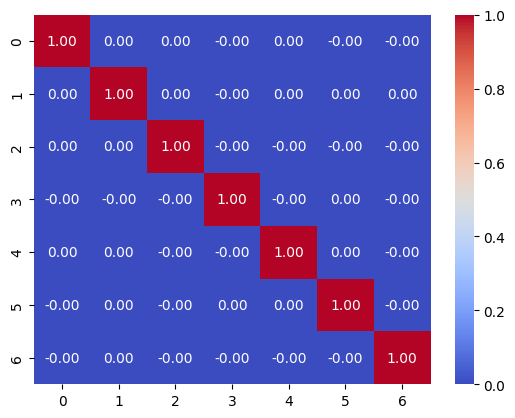

In [22]:
sns.heatmap(projected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

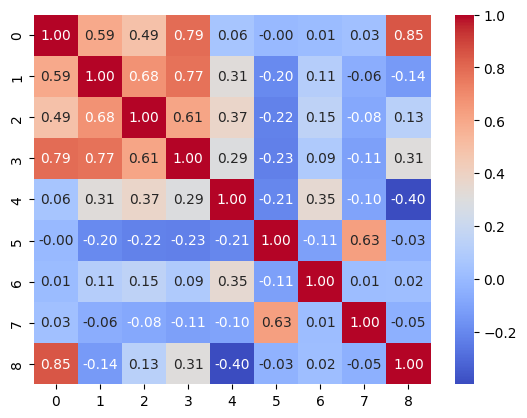

In [23]:
sns.heatmap(x_train_sc.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [24]:
projected_data

,0,1,2,3,4,5,6
0,-1.063261,-0.477373,-0.932839,0.064379,0.219429,0.769783,-0.772734
1,-0.950692,-0.539827,-0.952212,-0.119501,0.295834,0.817955,-0.827734
2,-0.896962,-0.564839,-0.995990,-0.269014,0.313004,0.842275,-0.842326
3,-0.888195,-0.575169,-1.006175,-0.348808,0.300509,0.848707,-0.839791
4,-0.919674,-0.570241,-1.005126,-0.403608,0.249918,0.840028,-0.815276
...,...,...,...,...,...,...,...
10600,-1.608355,-0.635949,0.958367,-0.232219,0.585079,0.117704,-0.582189
10601,-1.675589,-0.774538,0.496077,-0.731765,0.413538,0.043704,-0.248805
10602,-1.670295,-0.894270,0.466710,-1.016962,0.354828,-0.028773,-0.127102
10603,-1.730396,-0.959172,0.720511,-0.973987,0.316390,-0.032137,-0.153805


In [25]:
y_train

,spot_id_delta
0,-36.874770
1,-12.643588
2,-1.950193
3,1.938272
4,0.199907
...,...
10600,6.029303
10601,13.576177
10602,17.478945
10603,17.559407


#### Réseau 

In [37]:
model = Sequential([
LSTM(48, activation='elu', input_shape=(7,1)),
Dense(64),
Dense(64),
Dense(1)])




model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(projected_data, y_train, epochs=10,validation_split=0.4, batch_size=3)


Epoch 1/10
2121/2121 [==============================] - 13s 5ms/step - loss: 1305.0658 - val_loss: 513.9402
Epoch 2/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1299.5953 - val_loss: 518.2072
Epoch 3/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1286.2677 - val_loss: 559.3334
Epoch 4/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1276.3184 - val_loss: 563.9987
Epoch 5/10
2121/2121 [==============================] - 14s 7ms/step - loss: 1267.9337 - val_loss: 540.5235
Epoch 6/10
2121/2121 [==============================] - 13s 6ms/step - loss: 1266.9778 - val_loss: 561.5283
Epoch 7/10
2121/2121 [==============================] - 13s 6ms/step - loss: 1261.0850 - val_loss: 566.0239
Epoch 8/10
2121/2121 [==============================] - 13s 6ms/step - loss: 1255.5010 - val_loss: 572.5208
Epoch 9/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1247.7732 - val_loss: 566.0974
Epoch 10/10
2121/2121 [=====

332/332 [==============================] - 1s 2ms/step


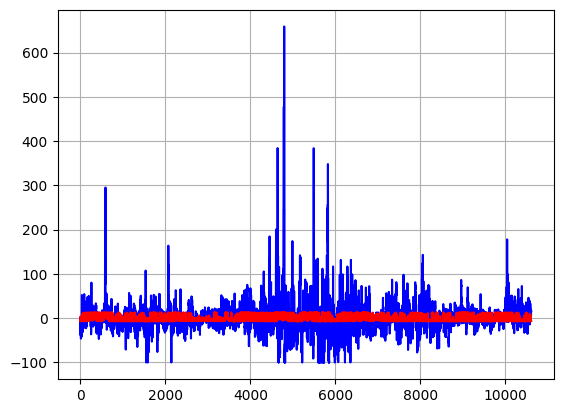

In [36]:
y_pred = model.predict(projected_data)
y_train_1 = y_train


# Display the result
plt.plot(y_train_1,'b-')
plt.plot(y_pred,"r-")
plt.grid()
plt.show()

## Regression Tree

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

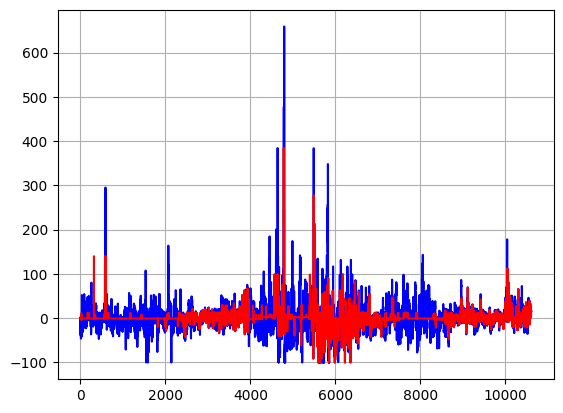

Mean Squared Error: 649.5582230160501


In [29]:
# Create a decision tree regressor
x_train_ = x_train[:6000]
x_test_ = x_train[6000:]
y_train_ = y_train[:6000]
y_test_ = y_train[6000:]
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train, y_train)

# Predict on the testing data
y_pred = tree_regressor.predict(x_train)

# Display the result
plt.plot(y_train,'b-')
plt.plot(y_pred,"r-")
plt.grid()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

## Regression Logistique

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(x_train, y_train)

# Prédire les étiquettes des données de test
y_pred = model.predict(x_train)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_train, y_pred)
print("Exactitude du modèle :", accuracy)

# Tracer les données et la frontière de décision
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.title('Logistic Regression Decision Boundary')
plt.show()


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values